# importing libraries and data file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('StudentsPerformance.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. Find out how many males and females participated in the test.

In [3]:
data.groupby('gender')['gender'].count()

gender
female    518
male      482
dtype: int64

In [ ]:
# There are 518 females and 482 males

# 2. What do you think about the students 'parentallevelofeducation?

In [8]:
data1=data.groupby(['parental level of education']).size()

In [13]:
data1

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

<AxesSubplot:title={'center':'parental level of education'}>

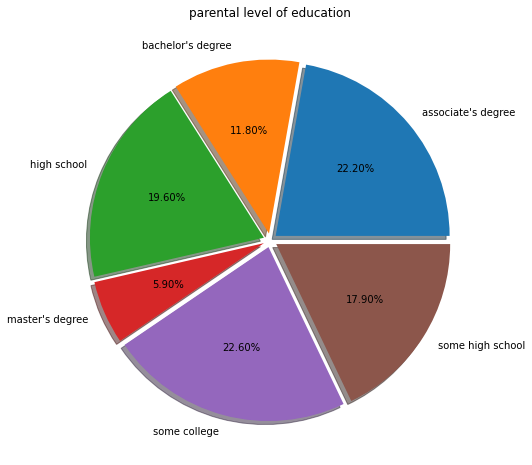

In [9]:
data1.plot.pie(y='parental level of education',figsize=(8, 8),autopct='%1.2f%%',title='parental level of education',
                       ylabel='',explode=(0.04, 0.04, 0.04, 0.04, 0.04, 0.04),shadow=True)

In [ ]:
# Majority of parents have gone to college or have an associate degree. Only 5.9% of parents have a masters degree

# 3. Who scores the most on average for math,reading and writing based on
    ● Gender
    ● Test preparation course

In [10]:
#data['Count']=1
data.groupby(by=['gender']).mean().round(2)

,math score,reading score,writing score
gender,,,
female,63.38,72.59,72.47
male,68.82,65.55,63.45


In [ ]:
# in math score male is leading by average where as female is leading in reading and writing

In [11]:
data.groupby(by=['test preparation course']).mean().round(2)

,math score,reading score,writing score
test preparation course,,,
completed,69.97,74.18,74.68
none,63.79,66.42,64.46


In [ ]:
# As per data those who completed test preparation course is scoring better in all three categories than
# student who didnt complete it

# 4. What do you think about the scoring variation for math,reading and writing 
based on
● Gender 
● Test preparation course


In [12]:
data.groupby(by=['gender']).mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [13]:
data.groupby(by=['gender']).std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [14]:
data.groupby(by=['test preparation course']).mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [15]:
data.groupby(by=['test preparation course']).std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [ ]:
# In both cases, gender and test preparation course, standard deviation is around 15 and the data 
# is not much dispersed from central tendency mean considering the population sample of 1000.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [16]:
data1=data.sort_values(by='math score',ascending=True)

In [17]:
q3=data1['math score'].quantile(q=.75)

In [18]:
high_math=data1[data1['math score']>=q3]

In [19]:
high_math

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
426,female,group D,some college,standard,none,77,68,77
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
851,male,group D,some college,standard,completed,77,62,62
...,...,...,...,...,...,...,...,...
516,female,group E,bachelor's degree,standard,none,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100


In [ ]:
#To identify highest 25% students in math score first sorted math score data in ascending order.
#Then found the third quartile which is 77. Extracted the students having math score value >=77

In [20]:
high_math.to_excel('math_score_25perc.xlsx')